# 0 - Importing necessary packages/libraries/APIs

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as std_scaler, OneHotEncoder as OHE
import pickle
import json
import matplotlib.pyplot as plt
import time
import gc

In [2]:
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## 0.1 - Importing dataset

In [4]:
chunk = pd.read_csv("./data/raw/base_animov.csv", sep = ",", decimal = ".", chunksize = 10000)
data = pd.concat(chunk, ignore_index = True)
del chunk

In [5]:
# Visualizing data
pd.set_option('display.max_columns', 500)
data.head()

,Unnamed: 0,burst_,step_id_,case_,x1_,y1_,x2_,y2_,t1_,t2_,dt_,sl_,ta_,id,tod_,dt,sex,age,weight,status,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,project_region,project_bioveg,long_x,lat_y,week,month,year,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,landC,landC2,landC3,topoS,slopeS,distdrainS,distwaterS,tcoverS,MaxNDVIS,MedNDVIS,distanthropicS,dist12S,dist345S,distPAS,humanfootS,popdenS,livestockS,natural,anthropic,nat_cover,nat_uncover,agro,impervious,forest,shrub,wet,grass,othernat,pasture,crops,treeplantation
0,1,1,1,1,460112.486604,8.124589e+06,459642.708232,8.124310e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,546.509353,-0.842281,12,day,3540,Female,4,NaN,Not Resident,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,Taiama,Pantanal,-57.379071,-16.964708,49,Dec,2014,8,9,103,2.148739,1097.009644,7.524905,53,0.443625,0.386948,33,1303.878784,1.239005,100001.0,4974.032715,0.000000,17.617554,6086.156738,9,584,water,water,water,0.573065,-0.189879,1.567394,-0.698854,-0.376567,-1.774053,-1.216331,-0.779261,0.002748,0.778078,-0.873692,-0.069257,-1.704792,-0.351417,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,460112.486604,8.124589e+06,460149.837656,8.124549e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,54.904831,0.940356,12,day,3540,Female,4,NaN,Not Resident,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,Taiama,Pantanal,-57.379071,-16.964708,49,Dec,2014,8,9,100,2.944002,850.614868,14.575096,0,0.517043,0.248764,3,1421.442993,1.239005,100000.0,4878.114258,0.000000,19.037918,6356.885742,9,584,natural,nat_cover,forest,-0.526971,0.172581,0.871653,-0.649019,-1.908395,-1.225676,-1.956591,-0.665560,-363.946425,0.723662,-0.833494,-0.069257,-1.704792,-0.075428,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,3,1,1,0,460112.486604,8.124589e+06,466048.009714,8.125024e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,5951.419492,1.836104,12,day,3540,Female,4,NaN,Not Resident,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,Taiama,Pantanal,-57.379071,-16.964708,49,Dec,2014,8,9,103,2.148680,512.545471,304.390930,21,0.664446,0.632003,11,6472.356934,1.000000,100001.0,3226.917969,0.000117,19.347666,11230.904297,9,584,natural,nat_uncover,wetland_mangrove,0.573065,-0.189906,-0.082947,1.399566,-1.301444,-0.124683,0.096436,4.219388,0.002748,-0.213093,-0.109797,-0.310191,-1.345502,-0.015241,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,4,1,1,0,460112.486604,8.124589e+06,460112.516197,8.124589e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.108833,0.467580,12,day,3540,Female,4,NaN,Not Resident,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,Taiama,Pantanal,-57.379071,-16.964708,49,Dec,2014,8,9,101,2.092207,892.295959,15.424905,89,0.497570,0.277879,33,1379.021362,1.239005,100001.0,4919.451172,0.000000,19.037918,6315.267578,9,584,water,water,water,-0.160292,-0.215644,0.989348,-0.643012,0.663920,-1.371123,-1.800620,-0.706588,0.002748,0.747113,-0.839674,-0.069257,-1.704792,-0.075428,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,460112.486604,8.124589e+06,460112.479737,8.124589e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.049526,0.053104,12,day,3540,Female,4,NaN,Not Resident,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,Taiama,Pantanal,-57.379071,-16.964708,49,Dec,2014,8,9,101,2.092207,892.295959,15.424905,89,0.497570,0.277879,33,1379.021362,1.239005,100001.0,4919.451172,0.000000,19.037918,6315.267578,9,584,water,water,water,-0.160292,-0.215644,0.989348,-0.643012,0.663920,-1.371123,-1.800620,-0.706588,0.002748,0.747113,-0.839674,-0.069257,-1.704792,-0.075428,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
x0 = data[data['id'] == 12]

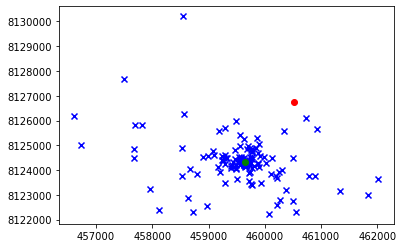

In [7]:
x01 = x0[x0['step_id_'] == 2].reset_index()
x01.drop('index',axis=1,inplace=True)
plt.scatter(x01['x2_'][1:], x01['y2_'][1:], marker='x', color='b')
plt.scatter(x01['x1_'][0], x01['y1_'][0], marker='o', color = 'g')
plt.scatter(x01['x2_'][0], x01['y2_'][0], marker='o', color='r')

In [8]:
# Dataset information
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954323 entries, 0 to 1954322
Data columns (total 83 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   burst_          int64  
 2   step_id_        int64  
 3   case_           int64  
 4   x1_             float64
 5   y1_             float64
 6   x2_             float64
 7   y2_             float64
 8   t1_             object 
 9   t2_             object 
 10  dt_             float64
 11  sl_             float64
 12  ta_             float64
 13  id              int64  
 14  tod_            object 
 15  dt              int64  
 16  sex             object 
 17  age             int64  
 18  weight          float64
 19  status          object 
 20  speed_kmh       float64
 21  sl              float64
 22  speed           float64
 23  nsd_            float64
 24  dir_abs         float64
 25  dir_rel         float64
 26  project_region  object 
 27  project_bioveg  object 
 28  long_x      

## 0.2 - Filter important variables

In [9]:
data = data.filter(['id', 'step_id_', 'x1_', 'y1_', 'x2_', 'y2_', 't1_', 't2_', 'dt_', 'sl_', 'ta_', 'tod_', 'dt',
                    'sex', 'age', 'weight', 'speed_kmh', 'sl', 'speed', 'nsd_', 'dir_abs', 'dir_rel', 'long_x',
                    'lat_y', 'month', 'hour', 'idloc', 'topo', 'slope', 'distdrain', 'distwater', 'tcover',
                    'MaxNDVI', 'MedNDVI', 'landcover', 'distanthropic', 'humanfoot', 'dist12', 'dist345', 'popden',
                    'livestock', 'distPA', 'biome', 'ecoregion', 'landC', 'landC2', 'landC3', 'case_'])
data.rename(columns = {'id': 'jaguar_ID', 'step_id_': 'step_Num', 'x1_': 'current_x', 'y1_': 'current_y',
                'x2_': 'suggested_x', 'y2_': 'suggested_y', 't1_': 'current_time', 't2_': 'suggested_time',
                'sl_': 'step_length', 'ta_': 'turning_angle', 'tod_': 'time_of_day'}, inplace = True)

In [10]:
data.head()

,jaguar_ID,step_Num,current_x,current_y,suggested_x,suggested_y,current_time,suggested_time,dt_,step_length,turning_angle,time_of_day,dt,sex,age,weight,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,long_x,lat_y,month,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,landC,landC2,landC3,case_
0,12,1,460112.486604,8.124589e+06,459642.708232,8.124310e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,546.509353,-0.842281,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,8,9,103,2.148739,1097.009644,7.524905,53,0.443625,0.386948,33,1303.878784,1.239005,100001.0,4974.032715,0.000000,17.617554,6086.156738,9,584,water,water,water,1
1,12,1,460112.486604,8.124589e+06,460149.837656,8.124549e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,54.904831,0.940356,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,8,9,100,2.944002,850.614868,14.575096,0,0.517043,0.248764,3,1421.442993,1.239005,100000.0,4878.114258,0.000000,19.037918,6356.885742,9,584,natural,nat_cover,forest,0
2,12,1,460112.486604,8.124589e+06,466048.009714,8.125024e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,5951.419492,1.836104,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,8,9,103,2.148680,512.545471,304.390930,21,0.664446,0.632003,11,6472.356934,1.000000,100001.0,3226.917969,0.000117,19.347666,11230.904297,9,584,natural,nat_uncover,wetland_mangrove,0
3,12,1,460112.486604,8.124589e+06,460112.516197,8.124589e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.108833,0.467580,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,8,9,101,2.092207,892.295959,15.424905,89,0.497570,0.277879,33,1379.021362,1.239005,100001.0,4919.451172,0.000000,19.037918,6315.267578,9,584,water,water,water,0
4,12,1,460112.486604,8.124589e+06,460112.479737,8.124589e+06,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.049526,0.053104,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,8,9,101,2.092207,892.295959,15.424905,89,0.497570,0.277879,33,1379.021362,1.239005,100001.0,4919.451172,0.000000,19.037918,6315.267578,9,584,water,water,water,0


## 0.3 - Preprocessing

### 0.3.1 - Scalling

In [11]:
# Using SKLearn standard scaler
# Scale continuous variables ("train" the scaler)
scaler = std_scaler()
scaler.fit(data[['hour','slope','topo','distdrain','distwater','tcover','MaxNDVI','MedNDVI','landcover','distanthropic',
            'humanfoot','dist12','dist345','popden','livestock','distPA']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
# Transform
data[['hour','slope','topo','distdrain','distwater','tcover','MaxNDVI','MedNDVI','landcover',
            'distanthropic','humanfoot','dist12','dist345','popden','livestock','distPA']] = scaler.transform(
data[['hour','slope','topo','distdrain','distwater','tcover','MaxNDVI','MedNDVI','landcover',
            'distanthropic','humanfoot','dist12','dist345','popden','livestock','distPA']])

In [13]:
# Coordinates and step length must receive different treatment
mu_x = np.mean(np.concatenate((data['current_x'].to_numpy(), data['suggested_x'].to_numpy())))
s_x = np.std(np.concatenate((data['current_x'].to_numpy(), data['suggested_x'].to_numpy())))
data['current_x'] = (data['current_x'] - mu_x) / s_x
data['suggested_x'] = (data['suggested_x'] - mu_x) / s_x

mu_y = np.mean(np.concatenate((data['current_y'].to_numpy(), data['suggested_y'].to_numpy())))
s_y = np.std(np.concatenate((data['current_y'].to_numpy(), data['suggested_y'].to_numpy())))
data['current_y'] = (data['current_y'] - mu_y) / s_y
data['suggested_y'] = (data['suggested_y'] - mu_y) / s_y

data['step_length'] = np.sqrt( np.square(data['current_x'] - data['suggested_x']) + np.square(data['current_y'] - data['suggested_y']))

In [14]:
data.head()

,jaguar_ID,step_Num,current_x,current_y,suggested_x,suggested_y,current_time,suggested_time,dt_,step_length,turning_angle,time_of_day,dt,sex,age,weight,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,long_x,lat_y,month,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,landC,landC2,landC3,case_
0,12,1,1.438553,-1.183689,1.356512,-1.236323,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.097473,-0.842281,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.323231,-0.262892,1.153363,-0.816055,-0.985918,-2.795879,-1.279811,3.650680,-0.491815,-0.321254,1.505504,-1.801789,-0.468091,0.459664,1.182559,9,584,water,water,water,1
1,12,1,1.438553,-1.183689,1.445076,-1.191274,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.010004,0.940356,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-1.199349,0.086821,0.634922,-0.758365,-2.892808,-2.098518,-2.166896,-0.662443,-0.372840,-0.321254,1.505431,-1.818720,-0.468091,0.583698,1.254373,9,584,natural,nat_cover,forest,0
2,12,1,1.438553,-1.183689,2.475111,-1.101756,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,1.039791,1.836104,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.323231,-0.262918,-0.076412,1.613157,-2.137248,-0.698404,0.293333,0.487723,4.738712,-0.493411,1.505504,-2.110178,-0.419554,0.610747,2.547266,9,584,natural,nat_uncover,wetland_mangrove,0
3,12,1,1.438553,-1.183689,1.438558,-1.183709,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.000020,0.467580,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,water,water,water,0
4,12,1,1.438553,-1.183689,1.438552,-1.183698,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.000009,0.053104,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,water,water,water,0


In [14]:
data[data['step_Num'] == 1]

,jaguar_ID,step_Num,current_x,current_y,suggested_x,suggested_y,current_time,suggested_time,dt_,step_length,turning_angle,time_of_day,dt,sex,age,weight,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,long_x,lat_y,month,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,landC,landC2,landC3,case_
0,12,1,1.438553,-1.183689,1.356512,-1.236323,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.097473,-0.842281,day,3540,Female,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.323231,-0.262892,1.153363,-0.816055,-0.985918,-2.795879,-1.279811,3.650680,-0.491815,-0.321254,1.505504,-1.801789,-0.468091,0.459664,1.182559,9,584,water,water,water,1
1,12,1,1.438553,-1.183689,1.445076,-1.191274,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.010004,0.940356,day,3540,Female,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-1.199349,0.086821,0.634922,-0.758365,-2.892808,-2.098518,-2.166896,-0.662443,-0.372840,-0.321254,1.505431,-1.818720,-0.468091,0.583698,1.254373,9,584,natural,nat_cover,forest,0
2,12,1,1.438553,-1.183689,2.475111,-1.101756,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,1.039791,1.836104,day,3540,Female,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.323231,-0.262918,-0.076412,1.613157,-2.137248,-0.698404,0.293333,0.487723,4.738712,-0.493411,1.505504,-2.110178,-0.419554,0.610747,2.547266,9,584,natural,nat_uncover,wetland_mangrove,0
3,12,1,1.438553,-1.183689,1.438558,-1.183709,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.000020,0.467580,day,3540,Female,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,water,water,water,0
4,12,1,1.438553,-1.183689,1.438552,-1.183698,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.000009,0.053104,day,3540,Female,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,water,water,water,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816030,117,1,-0.957333,0.500536,-0.957333,0.500536,2015-10-12 00:00:00,2015-10-12 04:00:00,4.0,0.000000,-1.166373,night,3600,Female,6,70.0,0.021420,21.420010,0.005950,5.401564e+03,5.069379,2.899073,-57.502840,-16.880880,Oct,-1.072534,9,-0.031191,-0.028790,-0.149100,-0.231182,0.633140,0.515283,-0.889486,-0.662443,-0.036381,-0.466252,1.505504,1.003851,0.177398,0.207640,-0.392079,9,584,natural,nat_cover,forest,0
1816031,117,1,-0.957333,0.500536,-0.957420,0.500536,2015-10-12 00:00:00,2015-10-12 04:00:00,4.0,0.000087,2.521469,night,3600,Female,6,70.0,0.021420,21.420010,0.005950,5.401564e+03,5.069379,2.899073,-57.502840,-16.880880,Oct,-1.072534,9,-0.031191,-0.028790,-0.149100,-0.231182,0.633140,0.515283,-0.889486,-0.662443,-0.036381,-0.466252,1.505504,1.003851,0.177398,0.207640,-0.392079,9,584,natural,nat_cover,forest,0
1816032,117,1,-0.957333,0.500536,-1.002249,0.493939,2015-10-12 00:00:00,2015-10-12 04:00:00,4.0,0.045398,2.351539,night,3600,Female,6,70.0,0.021420,21.420010,0.005950,5.401564e+03,5.069379,2.899073,-57.502840,-16.880880,Oct,-1.072534,9,-0.031191,0.281721,-0.149100,-0.556961,0.705098,0.465068,-0.619201,-0.662443,0.195410,-0.466252,1.505504,1.033039,0.149044,0.207640,-0.423911,9,584,natural,nat_cover,forest,0
1816033,117,1,-0.957333,0.500536,-0.914442,0.467174,2015-10-12 00:00:00,2015-10-12 04:00:00,4.0,0.054338,-1.548986,night,3600,Female,6,70.0,0.021420,21.420010,0.0

In [15]:
data[data['step_Num'] == 2]

,jaguar_ID,step_Num,current_x,current_y,suggested_x,suggested_y,current_time,suggested_time,dt_,step_length,turning_angle,time_of_day,dt,sex,age,weight,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,long_x,lat_y,month,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,landC,landC2,landC3,case_
201,12,2,1.356512,-1.236323,1.508338,-0.778779,2014-12-05 08:00:00,2014-12-05 12:00:00,4.0,0.482076,-2.451019,day,3600,Female,4,0.0,0.023549,23.548519,0.006541,2427.636389,3.525755,-2.401799,-57.370862,-16.94278,Dec,0.086370,13,-1.199349,-0.617866,0.550872,-0.877630,-0.014483,0.120076,0.942397,0.487723,-0.003452,-0.493411,1.505504,-1.501180,-0.202177,0.708366,1.023725,9,584,natural,nat_uncover,wetland_mangrove,1
202,12,2,1.356512,-1.236323,1.356512,-1.236325,2014-12-05 08:00:00,2014-12-05 12:00:00,4.0,0.000002,0.623070,day,3600,Female,4,0.0,0.023549,23.548519,0.006541,2427.636389,3.525755,-2.401799,-57.370862,-16.94278,Dec,0.086370,13,-0.323231,-0.262892,1.153363,-0.816055,-0.985918,-2.795879,-1.279811,3.650680,-0.491815,-0.321254,1.505504,-1.801789,-0.468091,0.459664,1.182559,9,584,water,water,water,0
203,12,2,1.356512,-1.236323,1.547090,-0.898395,2014-12-05 08:00:00,2014-12-05 12:00:00,4.0,0.387963,-2.653886,day,3600,Female,4,0.0,0.023549,23.548519,0.006541,2427.636389,3.525755,-2.401799,-57.370862,-16.94278,Dec,0.086370,13,-0.323231,-0.617856,-0.159237,-0.768195,0.489224,-1.863679,-0.673535,0.487723,-0.140711,-0.493411,1.505504,-1.617877,-0.160507,0.708366,1.152626,9,584,natural,nat_uncover,wetland_mangrove,0
204,12,2,1.356512,-1.236323,1.355398,-1.235539,2014-12-05 08:00:00,2014-12-05 12:00:00,4.0,0.001363,-1.114261,day,3600,Female,4,0.0,0.023549,23.548519,0.006541,2427.636389,3.525755,-2.401799,-57.370862,-16.94278,Dec,0.086370,13,-0.323231,-0.262892,1.153363,-0.816055,-0.985918,-2.795879,-1.279811,3.650680,-0.491815,-0.321254,1.505504,-1.801789,-0.468091,0.459664,1.182559,9,584,water,water,water,0
205,12,2,1.356512,-1.236323,1.287024,-1.220639,2014-12-05 08:00:00,2014-12-05 12:00:00,4.0,0.071236,-0.742471,day,3600,Female,4,0.0,0.023549,23.548519,0.006541,2427.636389,3.525755,-2.401799,-57.370862,-16.94278,Dec,0.086370,13,-0.615270,-0.392355,1.727716,0.208412,-1.165813,-0.532040,0.439125,0.487723,-0.791228,-0.321254,1.505504,-1.746820,-0.468091,0.459664,1.087334,9,584,natural,nat_uncover,wetland_mangrove,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816231,117,2,-0.948863,0.506002,-0.917743,0.537667,2015-10-12 04:00:00,2015-10-12 08:00:00,4.0,0.044398,0.220870,day,3600,Female,6,70.0,0.343126,343.125600,0.095313,35112.840000,5.221960,-1.844882,-57.502630,-16.87975,Oct,-0.493082,13,-0.907309,0.421375,-0.109121,-0.489580,0.345308,0.736309,-0.294016,0.487723,-0.204552,-0.466252,1.505504,0.995633,0.107353,0.207640,-0.407995,9,584,natural,nat_uncover,wetland_mangrove,0
1816232,117,2,-0.948863,0.506002,-1.001254,0.472452,2015-10-12 04:00:00,2015-10-12 08:00:00,4.0,0.062213,3.140271,day,3600,Female,6,70.0,0.343126,343.125600,0.095313,35112.840000,5.221960,-1.844882,-57.502630,-16.87975,Oct,-0.493082,13,-0.907309,-1.207789,-0.149100,-0.877630,-0.662106,-1.803150,-1.677170,0.487723,0.176953,-0.466252,1.505504,1.019601,0.157110,0.207640,-0.392079,9,584,natural,nat_uncover,wetland_mangrove,0
1816233,117,2,-0.948863,0.506002,-0.893660,0.478295,2015-10-12 04:00:00,2015-10-12 08:00:00,4.0,0.061766,-0.970082,day,3600,Female,6,70.0,0.343126,343.125600,0.095313,35112.840000,5.221960,-1.844882,-57.502630,-16.87975,Oct,-0.493082,13,-0.907309,-0.781601,-1.154863,-0.200171,-0.014483,0.244484,-0.556894,0.487723,-0.418084,-0.473338,1.505504,0.941636,0.079517,-0.450601,-0.339065,9,584,natural,nat_uncover,wetland_mangrove,0
1816234,117,2,-0.948863,0.506002,-0.947937,0.506190,2015-10-12 04:00:00,2015-10-12 08:00:00

In [16]:
data[data['step_Num'] == 3]

,jaguar_ID,step_Num,current_x,current_y,suggested_x,suggested_y,current_time,suggested_time,dt_,step_length,turning_angle,time_of_day,dt,sex,age,weight,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,long_x,lat_y,month,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,landC,landC2,landC3,case_
402,12,3,1.508338,-0.778779,1.512260,-0.767199,2014-12-05 12:00:00,2014-12-05 16:00:00,4.0,0.012227,-0.006522,day,3600,Female,4,0.0,0.080089,80.089177,0.022247,12253.530739,2.935105,-2.925576,-57.37065,-16.942225,Dec,0.665821,17,-0.907309,-0.617867,0.541874,-0.877630,-0.302315,-0.444079,0.556608,0.487723,0.059439,-0.493411,1.505504,-1.493556,-0.202177,0.708366,1.023921,9,584,natural,nat_uncover,wetland_mangrove,1
403,12,3,1.508338,-0.778779,1.513622,-0.780461,2014-12-05 12:00:00,2014-12-05 16:00:00,4.0,0.005545,-1.513734,day,3600,Female,4,0.0,0.080089,80.089177,0.022247,12253.530739,2.935105,-2.925576,-57.37065,-16.942225,Dec,0.665821,17,-1.199349,-0.617865,0.473845,-0.847593,-0.014483,0.059178,0.935185,0.487723,0.000114,-0.493411,1.505504,-1.508148,-0.190724,0.708366,1.034389,9,584,natural,nat_uncover,wetland_mangrove,0
404,12,3,1.508338,-0.778779,1.507503,-0.779886,2014-12-05 12:00:00,2014-12-05 16:00:00,4.0,0.001386,2.801973,day,3600,Female,4,0.0,0.080089,80.089177,0.022247,12253.530739,2.935105,-2.925576,-57.37065,-16.942225,Dec,0.665821,17,-1.199349,-0.617866,0.550872,-0.877630,-0.014483,0.120076,0.942397,0.487723,-0.003452,-0.493411,1.505504,-1.501180,-0.202177,0.708366,1.023725,9,584,natural,nat_uncover,wetland_mangrove,0
405,12,3,1.508338,-0.778779,1.546012,-0.856202,2014-12-05 12:00:00,2014-12-05 16:00:00,4.0,0.086103,-2.314088,day,3600,Female,4,0.0,0.080089,80.089177,0.022247,12253.530739,2.935105,-2.925576,-57.37065,-16.942225,Dec,0.665821,17,-0.615270,-0.287768,-0.159237,-0.040554,-1.201792,-0.542749,0.505123,0.487723,-0.059643,-0.493411,1.505504,-1.583945,-0.160418,0.708366,1.124825,9,584,natural,nat_uncover,wetland_mangrove,0
406,12,3,1.508338,-0.778779,1.384708,-0.706065,2014-12-05 12:00:00,2014-12-05 16:00:00,4.0,0.143429,1.415748,day,3600,Female,4,0.0,0.080089,80.089177,0.022247,12253.530739,2.935105,-2.925576,-57.37065,-16.942225,Dec,0.665821,17,-0.615270,-0.799965,1.368547,-0.877630,-0.194378,0.603697,0.925300,0.487723,-0.125060,-0.493411,1.505504,-1.386383,-0.159044,0.696854,0.806699,9,584,natural,nat_uncover,wetland_mangrove,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816432,117,3,-0.945091,0.529563,-0.881733,0.650570,2015-10-12 08:00:00,2015-10-12 12:00:00,4.0,0.136591,-0.344010,day,3600,Female,6,70.0,0.003098,3.097737,0.000860,118937.800000,2.676877,0.158159,-57.50026,-16.882050,Oct,0.086370,17,-0.323231,-0.263262,-0.149100,-0.707052,0.489224,-0.626021,-1.103383,0.487723,-0.335832,-0.474235,1.505504,1.038335,-0.468091,-1.078798,-0.431869,9,584,natural,nat_uncover,wetland_mangrove,0
1816433,117,3,-0.945091,0.529563,-0.525964,0.602129,2015-10-12 08:00:00,2015-10-12 12:00:00,4.0,0.425363,-1.241104,day,3600,Female,6,70.0,0.003098,3.097737,0.000860,118937.800000,2.676877,0.158159,-57.50026,-16.882050,Oct,0.086370,17,-0.323231,-0.617974,-0.149100,0.830267,0.453245,-0.947548,-1.557951,0.487723,-1.132474,-0.486982,1.505504,0.746528,-0.468091,-1.078798,-0.431869,9,584,natural,nat_uncover,wetland_mangrove,0
1816434,117,3,-0.945091,0.529563,-0.885173,0.575930,2015-10-12 08:00:00,2015-10-12 12:00:00,4.0,0.075763,-0.779606,day,3600,Female,6,70.0,0.003098,3.097737,0.000860,118937.800000,2.676877,0.158159,-57.50026,-16.882050,Oct,0.086370,17,-0.031191,0.014829,-0.109121,-0.695674,0.309329,0.487240,-0.745666,0.487723,-0.289700,-0.480100,1.505504,0.992655,-0.468091,-1.078798,-0.431869,9,584,natural,nat_uncover,wetland_mangrove,0
1816435,117,3,-0.945091,0.529563,-0.839942,0.755556,2015-

### 0.3.2 - One-Hot-Encoding

In [17]:
# One Hot Encodes categorical data
encoder = OHE()
encoder.fit(data[['month','landC','landC2','landC3']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [18]:
# Transform
codes = encoder.transform(data[['month','landC','landC2','landC3']]).toarray()
feature_names = encoder.get_feature_names(['month','landC','landC2','landC3'])
data = pd.concat([data.select_dtypes(exclude='object'),
              pd.DataFrame(codes,columns=feature_names).astype(int)], axis = 1)

In [19]:
# Cleaning
del codes, feature_names

In [20]:
data.head()

,jaguar_ID,step_Num,current_x,current_y,suggested_x,suggested_y,dt_,step_length,turning_angle,dt,age,weight,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,long_x,lat_y,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,case_,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,landC_anthropic,landC_natural,landC_water,landC2_agro,landC2_nat_cover,landC2_nat_uncover,landC2_water,landC3_forest,landC3_grassland,landC3_pasture_mosaic,landC3_shrubland,landC3_water,landC3_wetland_mangrove
0,12,1,1.438553,-1.183689,1.356512,-1.236323,4.0,0.097473,-0.842281,3540,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,-0.493082,9,-0.323231,-0.262892,1.153363,-0.816055,-0.985918,-2.795879,-1.279811,3.650680,-0.491815,-0.321254,1.505504,-1.801789,-0.468091,0.459664,1.182559,9,584,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,12,1,1.438553,-1.183689,1.445076,-1.191274,4.0,0.010004,0.940356,3540,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,-0.493082,9,-1.199349,0.086821,0.634922,-0.758365,-2.892808,-2.098518,-2.166896,-0.662443,-0.372840,-0.321254,1.505431,-1.818720,-0.468091,0.583698,1.254373,9,584,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,12,1,1.438553,-1.183689,2.475111,-1.101756,4.0,1.039791,1.836104,3540,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,-0.493082,9,-0.323231,-0.262918,-0.076412,1.613157,-2.137248,-0.698404,0.293333,0.487723,4.738712,-0.493411,1.505504,-2.110178,-0.419554,0.610747,2.547266,9,584,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,12,1,1.438553,-1.183689,1.438558,-1.183709,4.0,0.000020,0.467580,3540,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,12,1,1.438553,-1.183689,1.438552,-1.183698,4.0,0.000009,0.053104,3540,4,0.0,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


### 0.3.3 - Treating NaN Values

In [21]:
# Substituting every NaN for 0
data = data.fillna(0)

# 1 - Organize Jaguar Data

In [22]:
# Separates jaguar data into diferent files
def separate_jaguar_data(data, sav_dir = "./"):
    from pathlib import Path
    Path(sav_dir).mkdir(parents=True, exist_ok=True)
    jaguar_IDs = data['jaguar_ID'].unique()
    for ID in jaguar_IDs:
        jag_data_n = data[data['jaguar_ID'] == ID].copy()
        name = '/jag_'+str(int(ID))+'.csv'
        jag_data_n.to_csv(sav_dir+name, index = False)

In [23]:
separate_jaguar_data(data, sav_dir = "./data/jaguar_data")

In [24]:
# (Optional) Delete full data
del data

In [15]:
data.head()

,jaguar_ID,step_Num,current_x,current_y,suggested_x,suggested_y,current_time,suggested_time,dt_,step_length,turning_angle,time_of_day,dt,sex,age,weight,speed_kmh,sl,speed,nsd_,dir_abs,dir_rel,long_x,lat_y,month,hour,idloc,topo,slope,distdrain,distwater,tcover,MaxNDVI,MedNDVI,landcover,distanthropic,humanfoot,dist12,dist345,popden,livestock,distPA,biome,ecoregion,landC,landC2,landC3,case_
0,12,1,1.438553,-1.183689,1.356512,-1.236323,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.097473,-0.842281,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.323231,-0.262892,1.153363,-0.816055,-0.985918,-2.795879,-1.279811,3.650680,-0.491815,-0.321254,1.505504,-1.801789,-0.468091,0.459664,1.182559,9,584,water,water,water,1
1,12,1,1.438553,-1.183689,1.445076,-1.191274,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.010004,0.940356,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-1.199349,0.086821,0.634922,-0.758365,-2.892808,-2.098518,-2.166896,-0.662443,-0.372840,-0.321254,1.505431,-1.818720,-0.468091,0.583698,1.254373,9,584,natural,nat_cover,forest,0
2,12,1,1.438553,-1.183689,2.475111,-1.101756,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,1.039791,1.836104,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.323231,-0.262918,-0.076412,1.613157,-2.137248,-0.698404,0.293333,0.487723,4.738712,-0.493411,1.505504,-2.110178,-0.419554,0.610747,2.547266,9,584,natural,nat_uncover,wetland_mangrove,0
3,12,1,1.438553,-1.183689,1.438558,-1.183709,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.000020,0.467580,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,water,water,water,0
4,12,1,1.438553,-1.183689,1.438552,-1.183698,2014-12-05 04:00:00,2014-12-05 08:00:00,4.0,0.000009,0.053104,day,3540,Female,4,NaN,0.419086,419.085953,0.116413,6.431467e+06,5.907863,2.539624,-57.379071,-16.964708,Dec,-0.493082,9,-0.907309,-0.287751,0.722624,-0.751411,0.309329,-2.283479,-1.979990,3.650680,-0.415771,-0.321254,1.505504,-1.811424,-0.468091,0.583698,1.243333,9,584,water,water,water,0
